In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../Cleaned_laptopData.csv')

In [6]:
df.drop('Unnamed: 0',1,inplace=True )

In [8]:
df.drop("Memory",1,inplace=True)

In [9]:
df

,company,inches,ram,weight,price,new_screenreso,new_cpu,new_clockspd,new_gpu,new_OS,isTouchScrn,HDD,SSD
0,Apple,13.3,8,1.37,71378.6832,2560x1600,Intel Core i5,2.3,Intel,MAC OS,0,0,128
1,Apple,13.3,8,1.34,47895.5232,1440x900,Intel Core i5,1.8,Intel,MAC OS,0,0,0
2,HP,15.6,8,1.86,30636.0000,1920x1080,Intel Core i5,2.5,Intel,Other,0,0,256
3,Apple,15.4,16,1.83,135195.3360,2880x1800,Intel Core i7,2.7,AMD,MAC OS,0,0,512
4,Apple,13.3,8,1.37,96095.8080,2560x1600,Intel Core i5,3.1,Intel,MAC OS,0,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,14.0,4,1.80,33992.6400,1920x1080,Intel Core i7,2.5,Intel,Windows,1,0,128
1299,Lenovo,13.3,16,1.30,79866.7200,3200x1800,Intel Core i7,2.5,Intel,Windows,1,0,512
1300,Lenovo,14.0,2,1.50,12201.1200,1366x768,Intel other Processor,1.6,Intel,Windows,0,0,0
1301,HP,15.6,6,2.19,40705.9200,1366x768,Intel Core i7,2.5,AMD,Windows,0,1000,0


In [10]:
X = df.drop("price",1)
Y = df.price

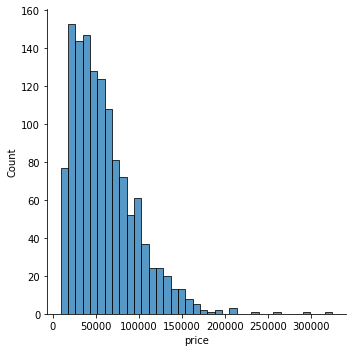

In [12]:
sns.displot(Y)

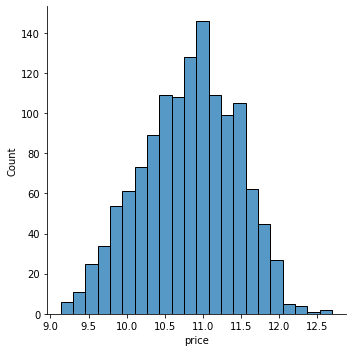

In [14]:
Y = np.log(Y)
sns.displot(Y)

In [15]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=43, test_size=0.20)

In [17]:
##cols
cat_cols = X.select_dtypes('O').columns
num_cols = X.select_dtypes(exclude='O').columns
print(cat_cols)
print(num_cols)


Index(['company', 'new_screenreso', 'new_cpu', 'new_gpu', 'new_OS'], dtype='object')
Index(['inches', 'ram', 'weight', 'new_clockspd', 'isTouchScrn', 'HDD', 'SSD'], dtype='object')


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1303 non-null   object 
 1   inches          1303 non-null   float64
 2   ram             1303 non-null   int64  
 3   weight          1303 non-null   float64
 4   new_screenreso  1303 non-null   object 
 5   new_cpu         1303 non-null   object 
 6   new_clockspd    1303 non-null   float64
 7   new_gpu         1303 non-null   object 
 8   new_OS          1303 non-null   object 
 9   isTouchScrn     1303 non-null   int64  
 10  HDD             1303 non-null   int64  
 11  SSD             1303 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 122.3+ KB


In [37]:
##prepro
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
sc = StandardScaler()

##pipe
p_cats = make_pipeline(ohe)

##TF
TF = make_column_transformer(
(p_cats, cat_cols),    
remainder='passthrough'
# passthrough
)


In [38]:
TF.fit_transform(x_train)

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.56e+02],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.56e+02],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+03, 0.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.00e+03, 2.56e+02],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+03, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 2.56e+02]])

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
rfc = RandomForestRegressor()
svm = SVR()

In [91]:
def build_model(fm, x,y,x_test,y_test):
    model = make_pipeline(TF,sc, fm)
    model.fit(x,y)
    y_pred = model.predict(x_test)
    score =r2_score(y_pred, y_test)
    mae = mean_absolute_error(y_pred, y_test)
    print(f"score: {score} , mae:{mae} ")
    return model

In [92]:
fm1 = build_model(rfc, x_train,y_train, x_test, y_test)

score: 0.8869753282820748 , mae:0.14454968620574715 


In [93]:
fm2 = build_model(svm, x_train,y_train, x_test, y_test)

score: 0.8251821952091686 , mae:0.17166358298942203 


In [115]:
test_this = x_test.sample(1)
y_ans = y_test.loc[test_this.index]
y_ans = np.array(np.exp(y_ans))
print(f"pred: {np.exp(fm1.predict(test_this))[0]}, Y: {y_ans} ")
print(f"pred: {np.exp(fm2.predict(test_this))[0]}, Y: {y_ans} ")


pred: 82556.5764424067, Y: [105228.] 
pred: 77901.80182785865, Y: [105228.] 


In [123]:
rfc = RandomForestRegressor(200, min_samples_leaf=4 )

build_model(rfc, x_train,y_train, x_test,y_test)

score: 0.8593388289319073 , mae:0.15950720719779993 


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['company', 'new_screenreso', 'new_cpu', 'new_gpu', 'new_OS'], dtype='object'))])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_leaf=4, n_estimators=200))])

In [124]:
import joblib
joblib.dump(fm1,'LPTP.pkl')


['LPTP.pkl']

In [126]:
joblib.dump(df, 'LPTP_DF.pkl')

['LPTP_DF.pkl']

In [127]:
!pwd

/home/wpnx/Codes/MLDL/ML_DL_Projects/wpnx-tt/mainLaptop


In [129]:
X.columns

Index(['company', 'inches', 'ram', 'weight', 'new_screenreso', 'new_cpu',
       'new_clockspd', 'new_gpu', 'new_OS', 'isTouchScrn', 'HDD', 'SSD'],
      dtype='object')

In [130]:
joblib.dump(X,"LPTP_DF.pkl")

['LPTP_DF.pkl']